In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

In [44]:
# Set the number of synthetic data points as a variable
num_samples = 100000
np.random.seed(8)

In [45]:



# Generate synthetic data
rainy_data = pd.DataFrame({
    'Temperature': np.random.normal(10, 5, num_samples),
    'Humidity': np.random.normal(80, 10, num_samples),
    'Wind_Speed': np.random.normal(5, 2, num_samples),
    'Weather': 'Rainy'
})

cloudy_data = pd.DataFrame({
    'Temperature': np.random.normal(20, 5, num_samples),
    'Humidity': np.random.normal(60, 10, num_samples),
    'Wind_Speed': np.random.normal(10, 3, num_samples),
    'Weather': 'Cloudy'
})

sunny_data = pd.DataFrame({
    'Temperature': np.random.normal(30, 5, num_samples),
    'Humidity': np.random.normal(40, 10, num_samples),
    'Wind_Speed': np.random.normal(15, 5, num_samples),
    'Weather': 'Sunny'
})


In [46]:

# Concatenate the datasets
weather_data = pd.concat([rainy_data, cloudy_data, sunny_data], ignore_index=True)

# Shuffle the dataset 
weather_data = weather_data.sample(frac=1, random_state=8).reset_index(drop=True)

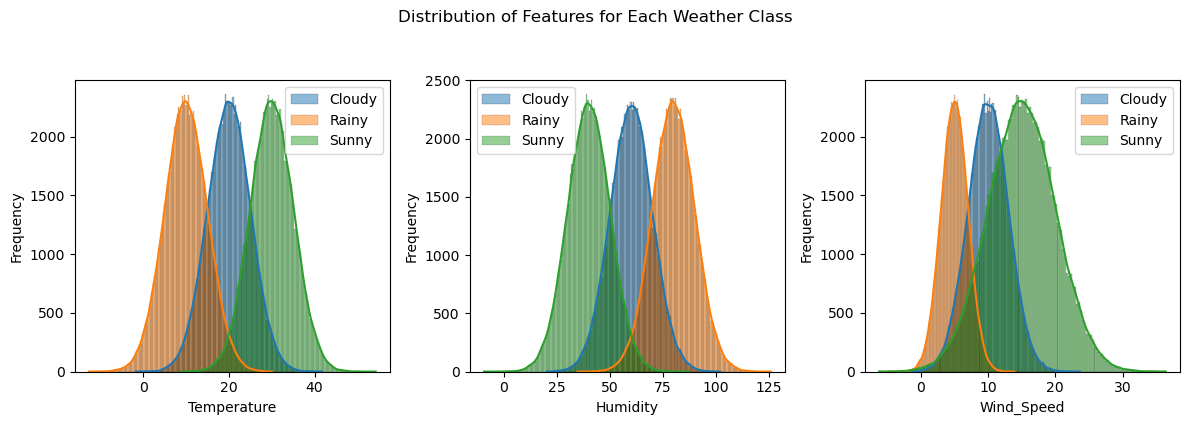

In [47]:

# EDA - Distribution of Numerical Features for Each Weather Class
numerical_cols = ['Temperature', 'Humidity', 'Wind_Speed']
categorical_col = 'Weather'

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(12, 4))

for i, col in enumerate(numerical_cols):
    for weather_class in weather_data[categorical_col].unique():
        sns.histplot(weather_data[weather_data[categorical_col] == weather_class][col], kde=True, label=weather_class, ax=axes[i])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
plt.suptitle('Distribution of Features for Each Weather Class', y=1.05)

# Adjust layout
plt.tight_layout()
plt.show()


In [48]:
#Modeling
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    weather_data[['Temperature', 'Humidity', 'Wind_Speed']],
    weather_data['Weather'],
    test_size=0.5,
    random_state=42
)

# Create and train a K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=100)  # You can adjust the number of neighbors (n_neighbors) as needed
knn_model.fit(X_train, y_train)

import joblib
# Save the trained model to a file
joblib.dump(knn_model, 'weather_prediction_model.joblib')

['weather_prediction_model.joblib']

In [49]:
# Function to simulate weather based on input values
def simulate_weather(temp, humidity, wind_speed):
    # Create a DataFrame with the provided input values
    input_data = pd.DataFrame({
        'Temperature': [temp],
        'Humidity': [humidity],
        'Wind_Speed': [wind_speed]
    })

    # Load the trained KNN model
    knn_model = joblib.load('weather_prediction_model.joblib')
    # Predict the upcoming weather
    predicted_weather = knn_model.predict(input_data)
    # Display the simulated weather
    print(f'Simulated Weather: {predicted_weather[0]}')

# Simulate weather for random input values
random_temp = np.random.normal(25, 5)
random_humidity = np.random.normal(50, 10)
random_wind_speed = np.random.normal(12, 4)

# Use the simulate_weather function
simulate_weather(random_temp, random_humidity, random_wind_speed)

Simulated Weather: Sunny


In [50]:


# Load the trained KNN model
knn_model = joblib.load('weather_prediction_model.joblib')

# Predict weather conditions for the test set
predicted_weather = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_weather)
print(f'Overall Accuracy: {accuracy:.2%}\n')

# Calculate precision for each class
weather_classes = weather_data['Weather'].unique()
precision_by_class = precision_score(y_test, predicted_weather, average=None, labels=weather_classes)

# Display precision for each class
for i, weather_class in enumerate(weather_classes):
    print(f'Precision for {weather_class}: {precision_by_class[i]:.2%}')

Overall Accuracy: 93.33%

Precision for Cloudy: 89.82%
Precision for Rainy: 95.53%
Precision for Sunny: 94.63%


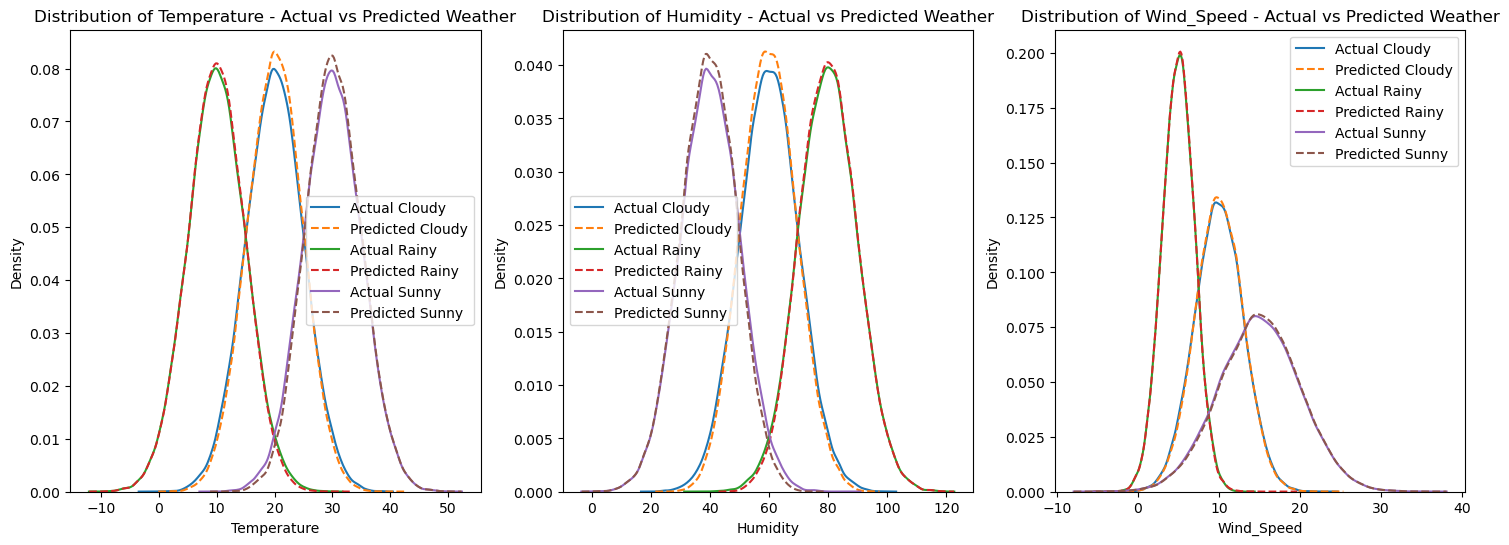

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis
# Combine actual and predicted weather conditions with their features
eda_data = X_test.copy()
eda_data['Actual_Weather'] = y_test
eda_data['Predicted_Weather'] = predicted_weather

# Set the number of columns for subplots
num_cols = len(numerical_cols)

# Visualize the relationship between actual and predicted weather conditions in one row
plt.figure(figsize=(18, 6))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, num_cols, i)
    
    for weather_class in weather_data['Weather'].unique():
        sns.kdeplot(data=eda_data[eda_data['Actual_Weather'] == weather_class][col], label=f'Actual {weather_class}')
        sns.kdeplot(data=eda_data[eda_data['Predicted_Weather'] == weather_class][col], label=f'Predicted {weather_class}', linestyle='dashed')
    
    plt.title(f'Distribution of {col} - Actual vs Predicted Weather')
    plt.legend()

plt.show()


In [52]:
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt

# Load the trained KNN model
knn_model = joblib.load('weather_prediction_model.joblib')

# Function to predict upcoming weather based on user input with confidence level and visualization
def predict_upcoming_weather(temp, humidity, wind_speed):
    # Create a DataFrame with the provided input values
    input_data = pd.DataFrame({
        'Temperature': [temp],
        'Humidity': [humidity],
        'Wind_Speed': [wind_speed]
    })

    # Predict the upcoming weather and get the prediction probabilities
    predicted_weather_prob = knn_model.predict_proba(input_data)
    predicted_weather = knn_model.predict(input_data)[0]

    # Display the predicted weather and confidence level
    confidence_level = predicted_weather_prob.max()
    print(f'Predicted Weather: {predicted_weather} with Confidence Level: {confidence_level:.2f}')

    # Visualization of Prediction
    labels = knn_model.classes_
    plt.bar(labels, predicted_weather_prob[0], color=['blue' if label == predicted_weather else 'gray' for label in labels])
    plt.xlabel('Weather Condition')
    plt.ylabel('Probability')
    plt.title('Prediction Probabilities for Weather Conditions')
    plt.show()

# Create sliders for user input values
temp_slider = widgets.FloatSlider(value=25, min=0, max=40, step=1, description='Temperature')
humidity_slider = widgets.FloatSlider(value=50, min=0, max=100, step=1, description='Humidity')
wind_speed_slider = widgets.FloatSlider(value=10, min=0, max=20, step=1, description='Wind Speed')

# Use the interact function to update the prediction based on the slider values
interact(predict_upcoming_weather, temp=temp_slider, humidity=humidity_slider, wind_speed=wind_speed_slider)


interactive(children=(FloatSlider(value=25.0, description='Temperature', max=40.0, step=1.0), FloatSlider(valu…

<function __main__.predict_upcoming_weather(temp, humidity, wind_speed)>